In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 
from tensorflow.keras.models import save_model, load_model


In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imgf = image.load_img('/content/drive/MyDrive/FotoFour.jpg', target_size=(28,28), color_mode = 'grayscale') # Загружаю картинку

In [ ]:
imgf

In [ ]:
imgf = image.img_to_array(imgf)     # Преобразую в массив

In [ ]:
imgf.shape

(28, 28, 1)

In [ ]:
imgf=255-imgf     # Инверсия цветов картинки
imgf

array([[[ 68.],
        [ 46.],
        [ 48.],
        [ 52.],
        [ 49.],
        [ 52.],
        [ 53.],
        [ 58.],
        [ 55.],
        [ 56.],
        [ 53.],
        [ 53.],
        [ 62.],
        [ 54.],
        [ 50.],
        [ 54.],
        [ 55.],
        [ 52.],
        [ 55.],
        [ 61.],
        [ 56.],
        [ 57.],
        [ 52.],
        [ 61.],
        [ 56.],
        [ 54.],
        [ 51.],
        [ 58.]],

       [[ 51.],
        [ 41.],
        [ 49.],
        [ 50.],
        [ 48.],
        [ 52.],
        [ 51.],
        [ 56.],
        [ 59.],
        [ 54.],
        [ 55.],
        [ 59.],
        [ 58.],
        [ 54.],
        [ 52.],
        [ 53.],
        [ 54.],
        [ 51.],
        [ 55.],
        [ 63.],
        [ 58.],
        [ 55.],
        [ 55.],
        [ 54.],
        [ 57.],
        [ 55.],
        [ 53.],
        [ 52.]],

       [[ 43.],
        [ 47.],
        [ 49.],
        [ 49.],
        [ 51.],
        [ 51.],
    

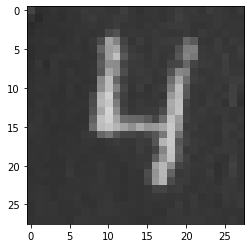

In [ ]:
plt.imshow(Image.fromarray(imgf[:, :, 0]).convert('RGB'))
plt.show()

In [ ]:
imgf = imgf.astype('float32')   # Преобразую во Float32

In [ ]:
imgf=imgf/255       # Нормализация данных

In [ ]:
imgf = imgf.reshape(1, 784)     #  Решейп

In [ ]:
imgf.shape

(1, 784)

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()   # Загрузил данные

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train_org.shape)
print(x_test_org.shape)

(60000, 28, 28)
(10000, 28, 28)


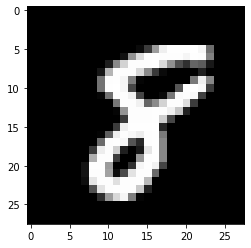

In [ ]:
n = 777  # номер картинки
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))   # отрисовка картинки
plt.show()  # вывод картинки

In [ ]:
y_train_org[n]

8

In [ ]:
x_train = x_train_org.reshape(60000, 784)     # Меняем размер формата входных 
x_test = x_test_org.reshape(10000, 784)       # данных
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
x_train[0].shape

(784,)

In [ ]:
x_train = x_train.astype('float32')   #Блок нормализации данных входных картинок
x_train = x_train / 255               # На 255 делим, чтобы диапазон был от 0 до
x_test = x_test.astype('float32')     #  1. Т.к. диапазон цвета от 0 до 255
x_test = x_test / 255

In [ ]:
y_train_org[7777]

8

In [ ]:
y_train = utils.to_categorical(y_train_org, 10)   # One hot encoding
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
x_test .shape

(10000, 784)

In [ ]:
print(y_train[9])  #Пример выходного вектора
print(y_test[9])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
print(y_train_org.shape)
print(y_test_org.shape)

(60000,)
(10000,)


In [ ]:
print(y_train_org[99])
print(y_test_org[99])

1
9


In [ ]:
imgone = image.load_img('/content/drive/MyDrive/Цифра1.png', target_size=(28,28), color_mode = 'grayscale') # Загружаю картинку
imgs = image.load_img('/content/drive/MyDrive/Цифра.png', target_size=(28,28), color_mode = 'grayscale') # Загружаю картинку

In [ ]:
imgone = image.img_to_array(imgone)     # Преобразую в массив
imgs = image.img_to_array(imgs) 

In [ ]:
imgone=255-imgone      # Инверсия цвета
imgs=255-imgs

In [ ]:
imgone = imgone.astype('float32')   # Преобразую во Float32
imgs = imgs.astype('float32')

In [ ]:
imgone=imgone/255       # Нормализация данных
imgs = imgs/255

In [ ]:
imgone = imgone.reshape(1, 784)     #  Решейп
imgs = imgs.reshape(1,784)

In [ ]:
model = Sequential()    #Создаем пустую нейронную сеть
model.add(Dense(800, input_dim = 784, activation='relu'))  #  Полносвязный слой на 800 нейронов
model.add(Dense(400, activation='relu'))   #Полносвязный слой на 400 нейронов
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Компиляция сети
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train, y_train, batch_size = 98, epochs=25,verbose=1)   # Обучаем нейронку

Epoch 1/100
613/613 [==============================] - 9s 15ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 2/100
613/613 [==============================] - 9s 14ms/step - loss: 0.0067 - accuracy: 0.9980
Epoch 3/100
613/613 [==============================] - 9s 14ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 4/100
613/613 [==============================] - 9s 14ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 5/100
613/613 [==============================] - 9s 14ms/step - loss: 0.0074 - accuracy: 0.9980
Epoch 6/100
613/613 [==============================] - 9s 14ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 7/100
613/613 [==============================] - 9s 14ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 8/100
613/613 [==============================] - 9s 14ms/step - loss: 0.0107 - accuracy: 0.9971
Epoch 9/100
613/613 [==============================] - 9s 14ms/step - loss: 0.0049 - accuracy: 0.9983
Epoch 10/100
613/613 [==============================] - 9s 14ms/step - loss: 0.007

In [ ]:
model.save_weights('model.Firsty_layer_Ultrapro')    # Сохраняем модель



In [ ]:
weights = model.get_weights() # Получим веса нашей модели (генерируются случайным образом)
print(weights) # Отбразим сгенерированные веса

[array([[ 0.03789395,  0.04276202, -0.00997612, ...,  0.00492284,
         0.02484427,  0.03732722],
       [ 0.01262135, -0.05844648, -0.04910359, ...,  0.01902701,
        -0.00916264, -0.03789466],
       [ 0.03782946, -0.00889468, -0.01682597, ...,  0.0575223 ,
         0.0017441 ,  0.02639151],
       ...,
       [ 0.01086785, -0.06126303, -0.02236241, ..., -0.02862687,
        -0.01159794,  0.04785822],
       [ 0.0185363 , -0.02715296,  0.05774807, ..., -0.00390043,
        -0.04320147, -0.05864877],
       [-0.05781471, -0.02387648, -0.05016238, ..., -0.0007029 ,
         0.03884447,  0.04371433]], dtype=float32), array([-0.01911673, -0.15528789, -0.16842136, -0.04925581, -0.08956622,
       -0.02761227, -0.17954531, -0.10576826, -0.20545809, -0.15188487,
       -0.14253324, -0.02013161, -0.03552927, -0.01915654, -0.02955207,
       -0.13227183, -0.00895401, -0.13601032,  0.01380276, -0.15013032,
       -0.01042469,  0.0926638 , -0.12855986,  0.05359842, -0.05837209,
       -0.

In [ ]:
model.load_weights('model.Firsty_layer_Ultrapro')

<function matplotlib.pyplot.show>

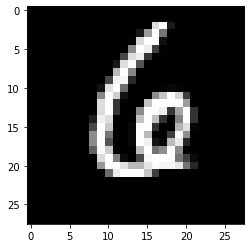

In [ ]:
#n_rec = 123
plt.imshow(Image.fromarray(x_test_org[123]).convert('RGBA'))
plt.show

In [ ]:
print(imgf.shape)

(1, 784)


In [ ]:
#x = np.expand_dims(imgf, axis=0)
#print(imgf.shape)

(1, 784)


In [ ]:
prediction = model.predict(imgf)

In [ ]:
print(prediction)

[[3.9273072e-03 6.1820110e-04 9.9016925e-06 1.0250304e-04 5.0344545e-01
  2.9593371e-02 2.5270027e-01 1.0701291e-02 1.9883415e-01 6.7527828e-05]]


In [ ]:
sum(prediction[0])

0.9999999697265594

In [ ]:
pred = np.argmax(prediction)
print(pred)

4
